In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

from utils import MAG_GAAP_U, MAG_GAAP_G, MAG_GAAP_R, MAG_GAAP_I, BANDS, COLOR_COLUMNS, calib_mag_for_ext, process_kids
from utils_plotting import plot_embedding

In [3]:
sns.set(style='ticks')

# Full cleaning on 500k

In [11]:
data = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.merged.cols.500k.csv', sdss_cleaning=False, cut='r')

Data shape: (502439, 37)
Droping NANs: 403753 (80.36%) left
Removing errors bigger than 1: 266766 (53.09%) left
Removing limiting magnitudes: 109011 (21.70%) left
Removing IMA flags: 89450 (17.80%) left
Removing R > 22: 34597 left


In [4]:
data = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.merged.cols.500k.csv', sdss_cleaning=False, cut='r')

Data shape: (502439, 37)
Droping NANs: 403753 left
Removing limiting magnitudes: 109024 left
Removing errors bigger than 1: 109011 left
Removing IMA flags: 89450 left
Removing R > 22: 34597 left


# Flags cleaning

In [4]:
def get_region(data, ra_min=51.64, ra_max=52.90, dec_min=-33.70, dec_max=-32.58):
    return data.loc[
        (ra_min < data['RAJ2000']) &
        (ra_max > data['RAJ2000']) &
        (dec_min < data['DECJ2000']) &
        (dec_max > data['DECJ2000'])
    ]

def save_object_regions(data, file_path, color='green'):
    
    header = '\n'.join([
        '# Region file format: DS9 version 4.1',
        'global color={color} dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1',
        'fk5'
    ])
    header = header.format(color=color)
        
    regions = '\n'.join(['circle {x}d {y}d {radius}d'.format(x=obj['RAJ2000'], y=obj['DECJ2000'], radius=0.001) for \
               index, obj in data.iterrows()])
    
    with open(file_path, 'w') as f:
        f.write('\n'.join([header, regions]))

In [6]:
# data = pd.read_csv('/media/snakoneczny/data/KiDS/KiDS.DR3.merged.flags.csv')
data = pd.read_csv('/media/snakoneczny/data/KiDS/KiDS.DR3.merged.cols.500k.csv')
data = calib_mag_for_ext(data)
data.shape

(502439, 41)

# Basic cleaning

In [7]:
# NANs
data = data.dropna(subset=[MAG_GAAP_U, MAG_GAAP_G, MAG_GAAP_R, MAG_GAAP_I])
data.shape

(403753, 41)

In [8]:
# Errors
for b in BANDS:
    data = data.loc[data['MAGERR_GAAP_{}'.format(b)] < 1]
    print(b, data.shape)

U (300891, 41)
G (294261, 41)
R (294202, 41)
I (266766, 41)


In [9]:
# Survey limiting magnitudes
data = data.loc[
    (data['MAG_GAAP_U'] < 24.3) &
    (data['MAG_GAAP_G'] < 25.1) &
    (data['MAG_GAAP_R'] < 24.9) &
    (data['MAG_GAAP_I'] < 23.8)
]
data.shape

(109011, 41)

In [10]:
# data_region = get_region(data)
# print(data_region.shape)
# save_object_regions(data_region, 'regions/basic_cleaning_r1.reg')

# t-SNE

In [26]:
data_sampled = data.sample(10000, random_state=1256)
features_scaled = MinMaxScaler().fit_transform(data_sampled[COLOR_COLUMNS])

In [27]:
embedding = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000,
                 n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0,
                 random_state=4680, method='barnes_hut', angle=0.5).fit_transform(features_scaled)

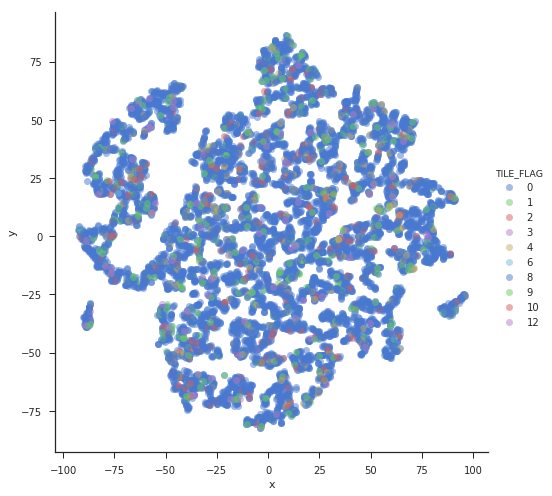

In [30]:
plot_embedding(embedding, data_sampled['TILE_FLAG'], label_name='TILE_FLAG')

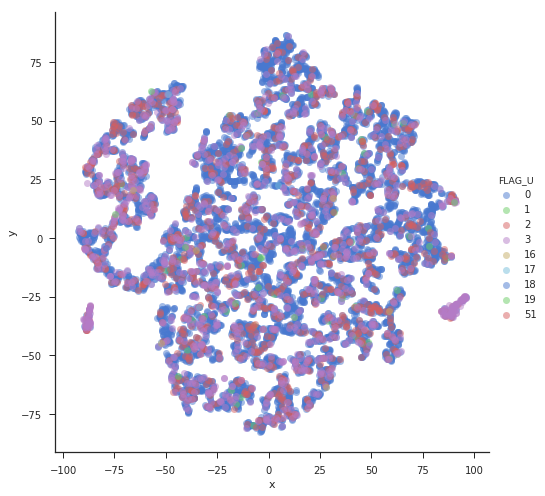

In [37]:
plot_embedding(embedding, data_sampled['FLAG_U'], label_name='FLAG_U')

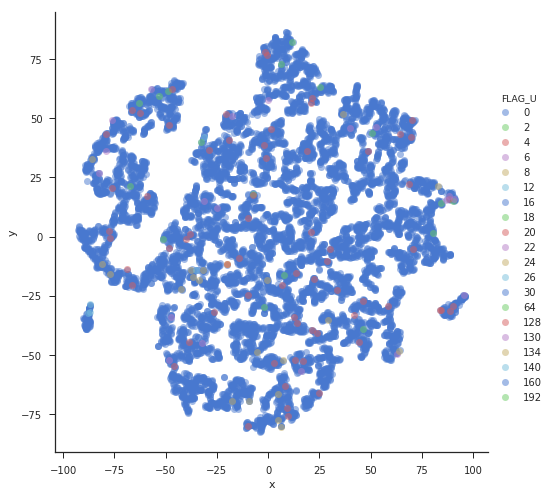

In [38]:
plot_embedding(embedding, data_sampled['IMAFLAGS_ISO_U'], label_name='FLAG_U')

# Objects listing

## SExtractor flags

In [64]:
data_risk = data.loc[(data['FLAG_U'] != 0) & (data['FLAG_G'] != 0) & (data['FLAG_R'] != 0) & (data['FLAG_I'] != 0)]
data_risk.shape

(5013790, 15)

In [65]:
data_region = get_region(data_risk)
print(data_region.shape)
display(data_region)

(13139, 15)


,RAJ2000,DECJ2000,FLAG_U,FLAG_G,FLAG_R,FLAG_I,IMAFLAGS_ISO_U,IMAFLAGS_ISO_G,IMAFLAGS_ISO_R,IMAFLAGS_ISO_I,MAGERR_GAAP_U,MAGERR_GAAP_G,MAGERR_GAAP_R,MAGERR_GAAP_I,TILE_FLAG
47916938,51.678481,-33.620216,2,2,2,2,0,0,16,16,0.356584,0.124679,9.610432e-02,0.173082,0
47916959,51.669598,-33.619579,3,3,3,3,0,0,16,16,0.618167,0.216397,1.081152e-01,0.156898,0
47916965,51.669864,-33.619467,2,2,2,2,0,0,16,16,0.342580,0.174903,9.131207e-02,0.211320,0
47917009,51.660787,-33.618953,2,2,2,2,0,0,16,16,0.333624,0.221379,1.271007e-01,0.225426,0
47917017,51.660718,-33.618759,3,3,3,3,0,0,16,16,0.310510,0.299177,1.379799e-01,0.271844,0
47917123,51.652737,-33.617153,2,2,2,2,0,0,16,16,0.372920,0.077757,7.398351e-02,0.176639,0
47917231,51.647118,-33.615892,2,2,2,2,0,0,16,16,0.453326,0.146643,8.143732e-02,0.080438,0
47917256,51.646919,-33.615517,3,3,3,3,0,0,16,16,0.558065,0.172369,1.018509e-01,0.091265,0
47917514,51.677717,-33.612129,2,2,2,2,0,0,16,16,0.229172,0.161769,1.294961e-01,0.209589,0
47917600,51.670255,-33.610943,2,2,2,2,0,0,16,16,0.271059,0.104361,1.002983e-01,0.138406,0


In [66]:
save_object_regions(data_region, 'regions/FLAG_UGRI_r1.reg')

## DR1 & DR2 masks

In [67]:
mask = 0b10000000
data_risk = data.copy()
for f in ['IMAFLAGS_ISO_U', 'IMAFLAGS_ISO_G', 'IMAFLAGS_ISO_R', 'IMAFLAGS_ISO_I']:
    data_risk = data_risk.loc[(data_risk[f] & mask) != 0]    
    print(f, data_risk.shape)

IMAFLAGS_ISO_U (188515, 15)
IMAFLAGS_ISO_G (51830, 15)
IMAFLAGS_ISO_R (39717, 15)
IMAFLAGS_ISO_I (26351, 15)


In [68]:
data_region = get_region(data_risk)
print(data_region.shape)
display(data_region)

(0, 15)


,RAJ2000,DECJ2000,FLAG_U,FLAG_G,FLAG_R,FLAG_I,IMAFLAGS_ISO_U,IMAFLAGS_ISO_G,IMAFLAGS_ISO_R,IMAFLAGS_ISO_I,MAGERR_GAAP_U,MAGERR_GAAP_G,MAGERR_GAAP_R,MAGERR_GAAP_I,TILE_FLAG


## Tertiary reflection halos

In [75]:
mask = 0b00100000
data_risk = data.copy()
for f in ['IMAFLAGS_ISO_U', 'IMAFLAGS_ISO_G', 'IMAFLAGS_ISO_R', 'IMAFLAGS_ISO_I']:
    data_risk = data_risk.loc[(data_risk[f] & mask) != 0]    
    print(f, data_risk.shape)

IMAFLAGS_ISO_U (5404, 15)
IMAFLAGS_ISO_G (5058, 15)
IMAFLAGS_ISO_R (4965, 15)
IMAFLAGS_ISO_I (4897, 15)


In [76]:
data_region = get_region(data_risk)
print(data_region.shape)
display(data_region)

(20, 15)


,RAJ2000,DECJ2000,FLAG_U,FLAG_G,FLAG_R,FLAG_I,IMAFLAGS_ISO_U,IMAFLAGS_ISO_G,IMAFLAGS_ISO_R,IMAFLAGS_ISO_I,MAGERR_GAAP_U,MAGERR_GAAP_G,MAGERR_GAAP_R,MAGERR_GAAP_I,TILE_FLAG
48414676,52.892638,-33.607491,19,19,19,19,96,104,44,108,0.319379,0.063020,0.013873,-2.082707e+10,4
48414678,52.889785,-33.603114,19,19,19,19,96,104,44,108,0.243351,0.087940,0.010809,-1.259196e-01,4
48414686,52.895449,-33.587304,19,19,19,19,32,44,44,104,0.255630,0.017812,0.004339,1.020675e-02,4
48415703,52.887196,-33.579163,19,19,19,19,36,46,46,46,0.071974,0.014309,0.005324,3.234504e-02,4
48416582,52.897433,-33.587562,27,27,27,27,32,108,44,104,0.130819,0.019266,0.004955,1.269090e-02,4
48417954,52.897598,-33.593620,16,16,16,16,32,40,40,40,0.983765,0.076843,0.092093,1.802678e-01,4
48417972,52.895450,-33.593459,0,0,0,0,32,40,40,40,0.720293,0.097362,0.065071,8.985815e-02,4
48418017,52.899094,-33.593146,16,16,16,16,32,44,40,40,0.262050,0.098237,0.090452,6.390997e-02,4
48418043,52.898291,-33.592947,16,16,16,16,32,40,40,40,0.480295,0.170133,0.095723,1.048601e-01,4
48418095,52.894809,-33.592582,0,0,0,0,32,40,40,40,0.788193,0.095761,0.055933,7.458086e-02,4


In [77]:
save_object_regions(data_region, 'regions/halos_r1.reg', color='blue')

## IMAFlag rest

In [72]:
mask = 0b01011111
data_risk = data.copy()
for f in ['IMAFLAGS_ISO_U', 'IMAFLAGS_ISO_G', 'IMAFLAGS_ISO_R', 'IMAFLAGS_ISO_I']:
    data_risk = data_risk.loc[(data_risk[f] & mask) != 0]    
    print(f, data_risk.shape)

IMAFLAGS_ISO_U (183188, 15)
IMAFLAGS_ISO_G (153581, 15)
IMAFLAGS_ISO_R (147633, 15)
IMAFLAGS_ISO_I (141062, 15)


In [73]:
data_region = get_region(data_risk)
print(data_region.shape)
display(data_region)

(105, 15)


,RAJ2000,DECJ2000,FLAG_U,FLAG_G,FLAG_R,FLAG_I,IMAFLAGS_ISO_U,IMAFLAGS_ISO_G,IMAFLAGS_ISO_R,IMAFLAGS_ISO_I,MAGERR_GAAP_U,MAGERR_GAAP_G,MAGERR_GAAP_R,MAGERR_GAAP_I,TILE_FLAG
47965834,51.652964,-33.009201,3,3,3,3,6,6,6,6,0.207188,1.404571e-02,5.578595e-03,7.812439e-03,0
47968591,51.643206,-33.009331,3,3,7,3,2,66,67,67,0.000830,1.424107e-04,-4.188635e+06,3.179560e-04,0
48204617,52.143897,-33.625662,3,7,7,7,4,70,71,70,0.000045,-4.040850e+06,-5.762014e+06,-3.213188e+06,0
48304760,51.822854,-32.625159,3,3,3,3,4,4,4,4,0.235210,6.535049e-02,2.594719e-02,4.469919e-02,0
48308121,52.223481,-32.581586,3,7,7,7,6,70,70,70,0.000174,-3.463715e+06,-7.416230e+06,-5.784114e+06,0
48308731,52.222464,-32.587411,0,0,0,0,6,6,6,4,0.190347,6.507314e-02,2.831163e-02,2.767910e-02,0
48309589,52.077694,-32.583107,3,3,3,3,4,4,24,24,0.851828,2.913076e-01,9.252649e-02,3.940680e-01,0
48414676,52.892638,-33.607491,19,19,19,19,96,104,44,108,0.319379,6.302002e-02,1.387330e-02,-2.082707e+10,4
48414678,52.889785,-33.603114,19,19,19,19,96,104,44,108,0.243351,8.794040e-02,1.080860e-02,-1.259196e-01,4
48414684,52.144015,-33.620535,3,3,3,3,6,6,6,6,0.162560,1.137645e-02,4.259885e-03,7.370389e-03,4


In [74]:
save_object_regions(data_region, 'regions/IMAFLAG_UGRI_rest_r1.reg', color='red')

## Tile flag

In [8]:
data_risk = data.loc[data['TILE_FLAG'] != 0]
data_risk.shape

(8233907, 15)

In [9]:
data_region = get_region(data_risk)
print(data_region.shape)
display(data_region)

(75020, 15)


,RAJ2000,DECJ2000,FLAG_U,FLAG_G,FLAG_R,FLAG_I,IMAFLAGS_ISO_U,IMAFLAGS_ISO_G,IMAFLAGS_ISO_R,IMAFLAGS_ISO_I,MAGERR_GAAP_U,MAGERR_GAAP_G,MAGERR_GAAP_R,MAGERR_GAAP_I,TILE_FLAG
48414673,52.420380,-33.615939,3,7,7,7,0,70,71,71,0.000100,-4.091405e+06,-4.374617e+06,-1.546192e+06,4
48414674,52.428630,-33.607782,2,6,6,6,0,70,71,70,0.000128,-4.723262e+06,-6.341176e+06,-4.122475e+06,4
48414675,52.419304,-33.616065,3,3,3,3,0,70,67,66,0.000152,1.577103e-04,-2.941258e+06,4.951311e-04,4
48414676,52.892638,-33.607491,19,19,19,19,96,104,44,108,0.319379,6.302002e-02,1.387330e-02,-2.082707e+10,4
48414677,52.228058,-33.620051,3,3,3,3,0,0,16,0,-2.144162,1.141467e-01,3.418658e-02,4.487919e-02,4
48414678,52.889785,-33.603114,19,19,19,19,96,104,44,108,0.243351,8.794040e-02,1.080860e-02,-1.259196e-01,4
48414679,52.660007,-33.591068,3,3,3,3,0,12,12,12,0.232343,6.471112e-02,2.565778e-02,5.136597e-02,4
48414680,52.664951,-33.583719,2,6,6,6,0,78,79,78,0.000274,-5.452398e+06,-7.675216e+06,-3.846991e+06,4
48414681,52.713090,-33.590836,0,0,0,0,0,8,8,8,0.027152,2.958143e-03,2.200001e-03,4.635735e-03,4
48414682,52.289742,-33.619395,0,0,0,0,0,0,66,0,0.001020,1.552346e-04,1.797137e-04,3.142834e-04,4


In [10]:
save_object_regions(data_region, 'regions/TILE_FLAG_r1.reg', color='yellow')

# Flag cleaning

In [9]:
# FLAGS
for f in ['FLAG_U', 'FLAG_G', 'FLAG_R', 'FLAG_I']:
    data = data.loc[data[f] == 0]
    print(f, data.shape)

FLAG_U (84220, 41)
FLAG_G (83892, 41)
FLAG_R (83444, 41)
FLAG_I (83419, 41)


In [10]:
# IMAFLAGS
mask = 0b01111111
for f in ['IMAFLAGS_ISO_U', 'IMAFLAGS_ISO_G', 'IMAFLAGS_ISO_R', 'IMAFLAGS_ISO_I']:
    data = data.loc[data[f] & mask == 0]    
    print(f, data.shape)

IMAFLAGS_ISO_U (83156, 41)
IMAFLAGS_ISO_G (79872, 41)
IMAFLAGS_ISO_R (72238, 41)
IMAFLAGS_ISO_I (71929, 41)


In [11]:
# R cut
data = data.loc[data['MAG_GAAP_CALIB_R'] < 22]
data.shape

(27334, 41)

In [12]:
# TILE FLAG
data = data.loc[data['TILE_FLAG'] == 0]
data.shape

(20256, 41)

In [13]:
# FLAGS
for f in ['FLAG_U', 'FLAG_G', 'FLAG_R', 'FLAG_I']:
    data = data.loc[data[f] == 0]
    print(f, data.shape)

FLAG_U (84220, 41)
FLAG_G (83892, 41)
FLAG_R (83444, 41)
FLAG_I (83419, 41)


In [14]:
# IMAFLAGS
mask = 0b01111111
for f in ['IMAFLAGS_ISO_U', 'IMAFLAGS_ISO_G', 'IMAFLAGS_ISO_R', 'IMAFLAGS_ISO_I']:
    data = data.loc[data[f] & mask == 0]    
    print(f, data.shape)

IMAFLAGS_ISO_U (83157, 41)
IMAFLAGS_ISO_G (79885, 41)
IMAFLAGS_ISO_R (72298, 41)
IMAFLAGS_ISO_I (72046, 41)


In [15]:
# TILE FLAG
data = data.loc[data['TILE_FLAG'] == 0]
data.shape

(52973, 41)

In [16]:
# R cut
data = data.loc[data['MAG_GAAP_CALIB_R'] < 22]
data.shape

(20291, 41)